## Evaluating results

In [33]:
import pandas as pd
import numpy as np
import ast

import matplotlib.pyplot as plt
import seaborn

**Importing results**

In [34]:
results = pd.read_csv('multi_cluster_tests_results.csv',
                      converters={"NMI":ast.literal_eval, "RI":ast.literal_eval})

## Evaluation for various no. clusters

**Visualization**

In [35]:
model_names = results["name"].unique()
model_names

array(['bbow', 'bow', 'tfidf', 'w2v-pre', 'w2v-train', 'd2v'],
      dtype=object)

In [36]:
results_gb = results.groupby("name")

**Model's best value for each number of clusters**

In [37]:
nmi_max_df = dict()
ri_max_df = dict()

for name in model_names:
  nmi_scores = np.stack(results_gb.get_group(name)['NMI'])
  ri_scores = np.stack( results_gb.get_group(name)['RI'] )

  nmi_max = np.max(nmi_scores, axis=0)
  ri_max = np.max(ri_scores, axis=0)

  nmi_max_df[ name ] = nmi_max
  ri_max_df[ name ] = ri_max


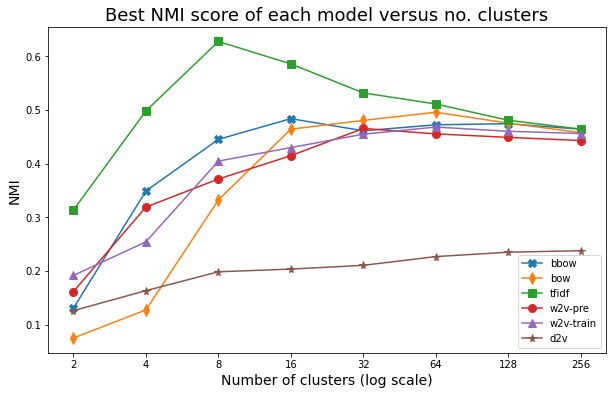

In [38]:
def plot_data_dict(data, title="", ylabel=""):
  linestyles = ['-X', '-d', '-s', '-o', '-^', '-*']
  fig, ax = plt.subplots( figsize=(10,6) )

  nclusters = [2**i for i in range(0, 9)]
  ax.set_xticklabels( nclusters )
  
  for i, (name, values) in enumerate(data.items()):
    ax.plot( values, linestyles[i], label=name, markersize=8 )

  ax.set_title(title, fontsize=18)
  
  ax.set_ylabel(ylabel, fontsize=14)
  ax.set_xlabel("Number of clusters (log scale)", fontsize=14)

  ax.legend()
  plt.show()

plot_data_dict(nmi_max_df, 
               title="Best NMI score of each model versus no. clusters", 
               ylabel="NMI")

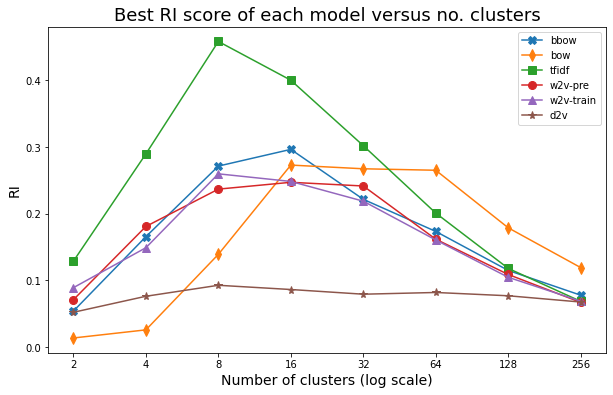

In [39]:
plot_data_dict(ri_max_df, 
               title="Best RI score of each model versus no. clusters", 
               ylabel="RI")

**Overall Score distribution of each model**

In [40]:
def boxplot_dict(data, title="", ylabel=""):
  fig, ax = plt.subplots()
  ax.boxplot(data.values())
  ax.set_xticklabels( list(data.keys()) )

  ax.set_title(title)
  ax.set_ylabel(ylabel)

In [41]:
results_apppend = results_gb[ ['NMI', 'RI'] ].agg('sum').to_dict()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


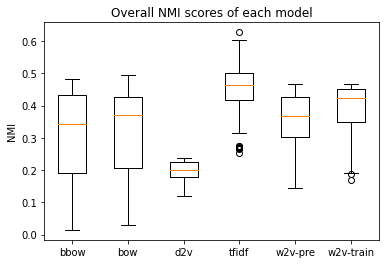

In [42]:
boxplot_dict(results_apppend['NMI'], 
             title="Overall NMI scores of each model", 
             ylabel="NMI" )

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


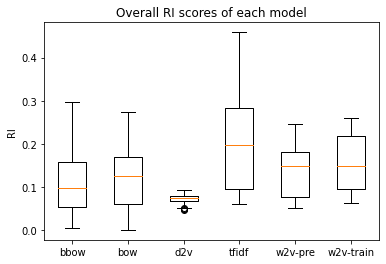

In [43]:
boxplot_dict(results_apppend['RI'], 
             title="Overall RI scores of each model", 
             ylabel="RI" )

Mean NMI and RI for each model in all runs

In [44]:
import copy
means_df = copy.deepcopy(results_apppend)
max_df = copy.deepcopy(results_apppend)

for _, dict_ in means_df.items():
  for key, value in dict_.items():
    dict_[key] = np.mean( np.array(value) )

for _, dict_ in max_df.items():
  for key, value in dict_.items():
    dict_[key] = np.max( np.array(value) )

In [45]:
means_df = pd.DataFrame(means_df).rename( columns={'NMI':'Mean-NMI', 'RI':'Mean-RI'} )
max_df = pd.DataFrame(max_df).rename( columns={'NMI':'Max-NMI', 'RI':'Max-RI'} )

pd.concat([means_df, max_df], axis=1)

,Mean-NMI,Mean-RI,Max-NMI,Max-RI
bbow,0.307000,0.112822,0.483553,0.296637
bow,0.314648,0.117462,0.495496,0.273073
d2v,0.193775,0.073022,0.237565,0.092800
tfidf,0.450726,0.204566,0.627342,0.458490
w2v-pre,0.345293,0.141887,0.465341,0.247255
w2v-train,0.379650,0.156116,0.467883,0.259951


## Evaluation when no. clusters match no. classes

In [46]:
results_match = pd.read_csv('10_clusters_tests_result.csv',
                            converters={"NMI":ast.literal_eval, "RI":ast.literal_eval})
dimentions = pd.read_csv('dimentions_df.csv')

results_match['NMI']=results_match['NMI'].apply( lambda x: x[0] ).astype(np.float32)
results_match['RI']=results_match['RI'].apply( lambda x: x[0] ).astype(np.float32)

results_match = pd.concat( [results_match, dimentions], axis=1 )

Best score, mean, max and std for each model

In [47]:
results_match_gb = results_match.groupby(by="name")
results_match_gb[ ['NMI', 'RI'] ].agg( ['mean', 'min', 'max'])

NMI                            RI                    
               mean       min       max      mean       min       max
name                                                                 
bbow       0.301422  0.082384  0.474123  0.168324  0.043317  0.306218
bow        0.309449  0.257755  0.331047  0.127027  0.104098  0.138585
d2v        0.192401  0.185029  0.203747  0.087453  0.083949  0.092998
tfidf      0.514596  0.383631  0.601464  0.371191  0.251210  0.454276
w2v-pre    0.349704  0.288319  0.397493  0.225486  0.176572  0.262998
w2v-train  0.399101  0.369524  0.421582  0.252972  0.223971  0.270380

Best scores for each model for each dimension 

In [48]:
results_match_gb = results_match.groupby(by=["name", "dim"])
results_match_gb[ ['NMI', 'RI'] ].agg( ['max'] ).unstack()

NMI                      ...        RI                    
                max                      ...       max                    
dim            50        100       300   ...      300       600       1000
name                                     ...                              
bbow       0.199962  0.337417  0.397809  ...  0.233413  0.306218  0.233374
bow        0.269287  0.325175  0.327750  ...  0.138314  0.138585  0.138024
d2v        0.203747  0.195221  0.189713  ...  0.084966  0.083949  0.084998
tfidf      0.433416  0.521321  0.579513  ...  0.447060  0.454276  0.446505
w2v-pre    0.288319  0.302754  0.375892  ...  0.245245  0.250187  0.262998
w2v-train  0.369524  0.404407  0.382651  ...  0.223971  0.269600  0.270380

[6 rows x 10 columns]

In [ ]:
plt.plot()

Top-5 Best model

In [49]:
results_match.sort_values(by='NMI', ascending=False)[ ['NMI', 'name', 'dim', 'mod'] ].head(5)

,NMI,name,dim,mod
28,0.601464,tfidf,1000,unigram
26,0.599414,tfidf,600,unigram
24,0.579513,tfidf,300,unigram
25,0.538078,tfidf,300,bigram
22,0.521321,tfidf,100,unigram


In [50]:
results_match.sort_values(by='RI', ascending=False)[ ['NMI', 'name', 'dim', 'mod'] ].head(5)

,NMI,name,dim,mod
26,0.599414,tfidf,600,unigram
24,0.579513,tfidf,300,unigram
28,0.601464,tfidf,1000,unigram
25,0.538078,tfidf,300,bigram
22,0.521321,tfidf,100,unigram
